<a href="https://colab.research.google.com/github/tobias-hoepfl/Digital-Organizations-SE/blob/main/assignments/assignment_4_Hoepfl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theory

In the following assignment, your task is to complete the MNIST Basics chapter. It is best to repeat everything from last week and try to answer the following questions. Afterwards you have to summarize the learned facts with two programming tasks.

<br>

What is "torch.cat()" and ".view(-1, 28*28)" doing in the beginning of the "The MNIST Loss Function" chapter?

<br>

**Answer:**

The command torch.cat() just concatenates the data for the threes and the data for the sevens. The command .view(-1, 28*28) then "stretches out" the indivdual pixels of each picture in one line containing the 784 pixels (because the rows and columns of the images are not relevant at this point). The following commands demonstrate very well how the ranks/dimensions change:

<br>

stacked_threes.shape:

torch.Size([6131, 28, 28])

<br>

stacked_sevens:

torch.Size([12396, 28, 28])

<br>

train_x.shape:

torch.Size([12396, 784])

<br>
<br>


Can you draw the neuronal network, which is manually trained in chapter "The MNIST Loss Function"?

<br>

**Answer:**

In the chapter "The MNIST Loss Function" it is not a full neuronal network yet but still a TLU, which is implemented in the following way:

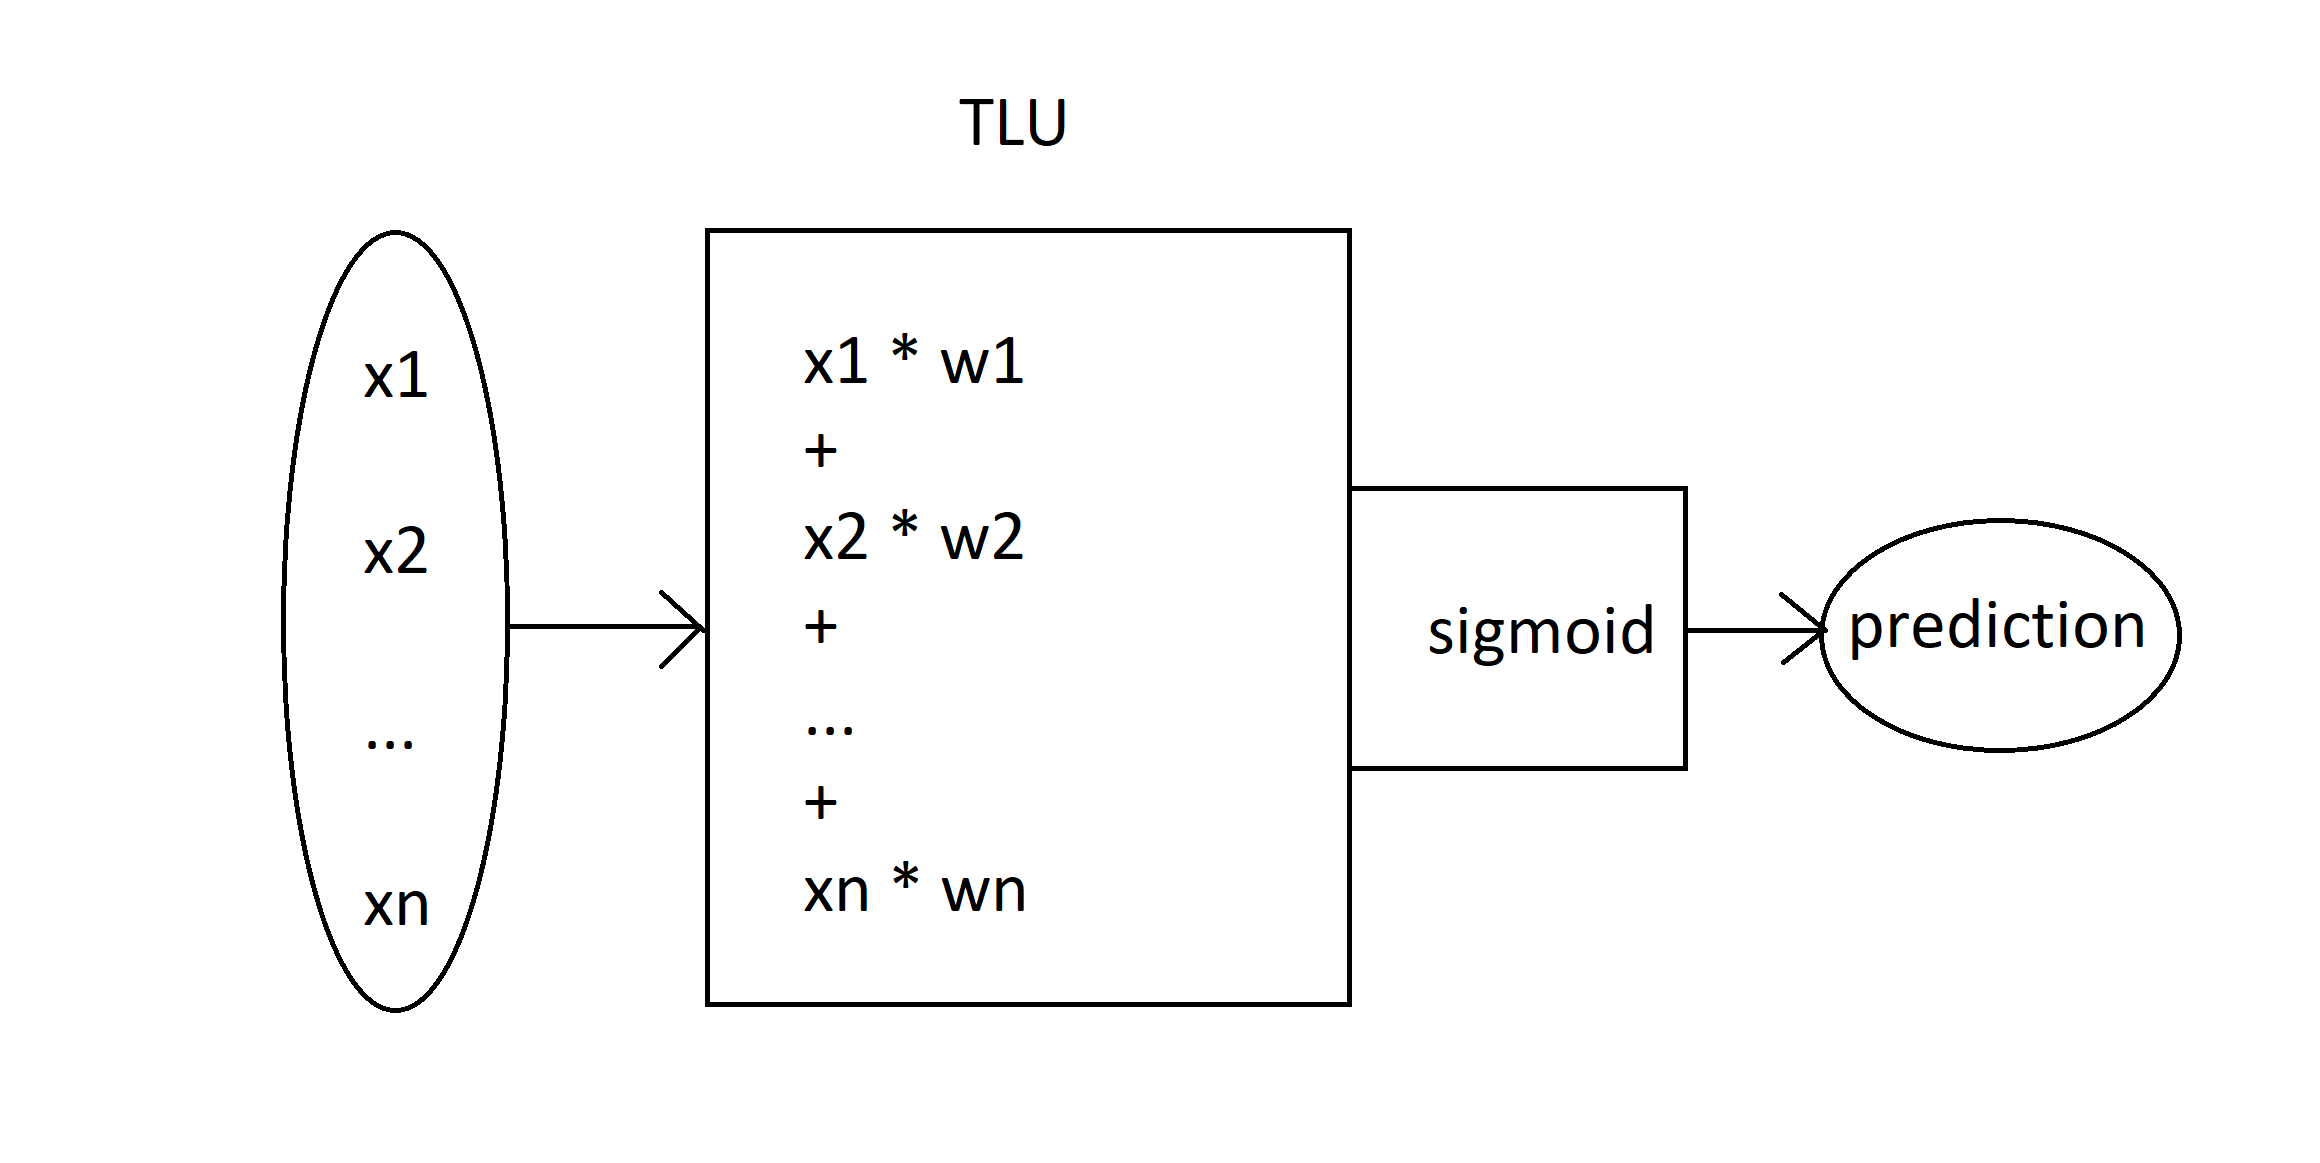




<br>

Why is it not possible to use the accuracy as loss function?

<br>

**Answer:**

Stochastic gradient descent requires small gradual improvements of the loss function in order to know in which directions the weights have to be changed.

When we use accuracy as a loss function, it is unlikely that we see an improvement when changing the weights (it only changes when the classification (e.g. for the number digit) changes).

So the loss function for accuracy is constant mostly, which we cannot work with.

<br>
<br>

What is the defined `mnist_loss` function doing? 

```
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()
```


<br>

**Answer:**

- if the label is 1, it calculates 1-prediction
- if the label is 0, it takes the prediction

So in any case, it calculates the difference between the actual label and the prediction. It then takes the mean over all instances, which we use as a loss function.

<br>
<br>


Why do we need additionaly the sigmoid() function? What is it technically in our TLU?


<br>

**Answer:**

- The sigmoid()-function always outputs a value between 0 and 1
- In a TLU architecture, the sigmoid function is applied to the weighted sum of the input features
- The output of the sigmoid function is a continuous value between 0 and 1.
- The output of the sigmoid function is then used to determine whether the threshold is crossed.
- The threshold determines whether the output of the TLU is 0 or 1.
- In a neural network it can be an activation function that can also introduce non-linearity

<br>
<br>

Again, what are mini batches, why are we using them and why should they be shuffeld?

<br>

**Answer:**

- Mini-batches: divide the training data into smaller subsets and run stochastic gradient descent steps using one mini-batch at a time
- Mini-batches allow for efficient computation and memory usage during training (always using the whole dataset, would be enormously computationally demanding)
- So, dividing data into smaller subsets enables more frequent parameter updates and faster convergence to the optimal solution
- Shuffling mini-batches prevents that the algorithm introduces a bias towards specific patterns in the data and is exposed to a more diverse range of training examples


#Practical Part

Try to understand all parts of the code needed to manually train a single TLU/Perceptron, so use and copy all parts of the code from "First Try: Pixel Similarity" to the "Putting it all together" chapter. In the second step, use an optimizer, a second layer, and a ReLU as a hidden activation function to train a simple neural network. When copying the code, think carefully about what you really need and how you can summarize it as compactly as possible. (Probably each attempt requires about 15 lines of code.)

In [ ]:
#Imports
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Preparation to get data in the right format
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

#Validation
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)

#Datasets
dset = list(zip(train_x,train_y))
valid_dset = list(zip(valid_x,valid_y))

In [ ]:
#YOUR TASK: Manually train a single layer perceptron without using an optimizer.

#randomly initialize parameters
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))
bias = init_params(1)

#does a prediction for the whole feature set train_x given the current parameters
def linear1(xb): return xb@weights + bias

#define loss function for a mini-batch
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

#calculate the gradient using the features, targets and the current model
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

def train_epoch(model, lr, params):
    #for each mini batch, calculate the gradient
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        #update all parameters according to the gradient and learning rate
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

#validate using validation data set
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

#data loader for mini batches
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)

#define learning rate and parameters
lr = 1. 
params = weights, bias

#iterate 20 times
for i in range(20):
    #train
    train_epoch(linear1, lr, params)
    #check accuracy using validation set
    print(validate_epoch(linear1), end=' ')

0.7303 0.8505 0.9007 0.9291 0.9388 0.9442 0.9525 0.9545 0.9588 0.9613 0.9623 0.9623 0.9632 0.9637 0.9647 0.9662 0.9667 0.9671 0.9671 0.9676 

In [ ]:
#YOUR TASK: Train a simple two-layer neural network (two perceptrons + hidden activation function) with built-in functions and an optimizer.

#Create our model
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

#Create optimizer class
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

#Create instance of optimizer class
opt = BasicOptim(simple_net.parameters(), lr)

#Train with each mini batch
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

train_model(simple_net, 20)

0.5068 0.7549 0.8935 0.9262 0.9394 0.9502 0.9555 0.9589 0.9609 0.9624 0.9638 0.9648 0.9677 0.9687 0.9692 0.9707 0.9716 0.9741 0.9751 0.9755 